In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
#dataset 마련

In [5]:
np.array(np.arange(36))
np.arange(36)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

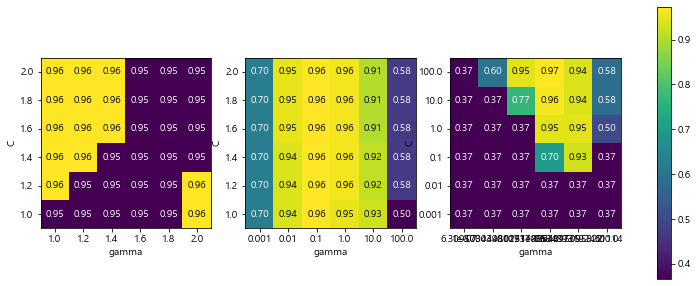

In [6]:
fig, axes = plt.subplots(1, 3 , figsize=(13,5))

param_grid_linear = {"C" : np.linspace(1,2,6), "gamma" : np.linspace(1,2,6)} 

param_grid_one_log = {"C" : np.linspace(1,2,6), "gamma":np.logspace(-3,2,6)}
# 1.0 e-3, ..., 1.0 e+2 
param_grid_range = {"C" : np.logspace(-3,2,6), "gamma":np.logspace(-7,2,6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(),param_grid, cv=5)
    grid_search.fit(X_train,y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    scores_image = mglearn.tools.heatmap(
        scores, xlabel= 'gamma', ylabel='C', xticklabels=param_grid["gamma"], 
        yticklabels=param_grid["C"],cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [7]:
np.array(np.arange(36).reshape(6,6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [8]:
param_grid = [{'kernel':['rbf'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
print(param_grid)


[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [9]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameter:", grid_search.best_params_)

best parameter: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [10]:
print("최고 교차 검증 점수 : {:.2f}.".format(grid_search.best_score_*100))

최고 교차 검증 점수 : 97.31.


In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
param_grid = {"C":[0.001,0.01,0.1,1,10,100],
             "gamma":[0.001,0.01,0.1,1,10,100]}
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5), 
                        iris.data, iris.target, cv=5)
print("cross val score : ",scores)
print("교차 검증 평균 점수:",scores.mean())

cross val score :  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001


In [13]:
#불균형 데이터
#균형이 맞지 않은 데이터를 학습했을ㄷ\때 벌어지는 일 

In [14]:
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()

In [16]:
digits.data[0]
# 8*8 형태의 데이터 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
y = digits.target == 9
#일부로 불균형 데이터 형성  9:1

In [18]:
y

array([False, False, False, ..., False,  True, False])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)


In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [22]:
pred_most_frquent = dummy_majority.predict(X_test)
pred_most_frquent

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
print("예측된 정답의 고윳값:",np.unique(pred_most_frquent))
# 예측된 정답의 고윳값: [False]

예측된 정답의 고윳값: [False]


In [24]:
print("test_accuracy: {:.2f}".format(dummy_majority.score(X_test,y_test)))
# test_accuracy: 0.89

test_accuracy: 0.89


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

In [26]:
pred_tree = tree.predict(X_test)
pred_tree

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,

In [27]:
print("예측된 정답의 고윳값:",np.unique(pred_tree))

예측된 정답의 고윳값: [False  True]


In [28]:
print("test_accuracy: {:.2f}".format(tree.score(X_test,y_test)))

test_accuracy: 0.92


In [30]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print("dummy acc : {:.2f}".format(dummy.score(X_test,y_test)))

dummy acc : 0.81


In [32]:
logreg = LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print("log reg acc : {:.2f}".format(logreg.score(X_test,y_test)))

log reg acc : 0.98


In [34]:
# 정확도의 정의 
# 오차 행렬 confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix 

In [38]:
confusion = confusion_matrix(y_test,pred_logreg)
print("오차 행렬:\n",confusion)

오차 행렬:
 [[399   3]
 [  5  43]]


In [40]:
print("dummy:")
print(confusion_matrix(y_test,pred_most_frquent))

dummy:
[[402   0]
 [ 48   0]]


In [42]:
print(" 무작위 dummy :")
print(confusion_matrix(y_test,pred_dummy))

 무작위 dummy :
[[357  45]
 [ 44   4]]


In [41]:
print("logreg:")
print(confusion_matrix(y_test,pred_logreg))

logreg:
[[399   3]
 [  5  43]]


In [43]:
print("결정 트리 :")
print(confusion_matrix(y_test, pred_tree))

결정 트리 :
[[376  26]
 [ 12  36]]


In [44]:
from sklearn.metrics import f1_score


In [45]:
print("빈도 기반의 더미 f1 score: {:.2f}".format(f1_score(y_test,pred_most_frquent)))
#빈도 기반의 더미 f1 score: 0.00

빈도 기반의 더미 f1 score: 0.00


In [46]:
print("무작위 더미 f1 score: {:.2f}".format(f1_score(y_test,pred_dummy)))
#무작위 더미 f1 score: 0.08

무작위 더미 f1 score: 0.08


In [50]:
print("tree f1 score: {:.2f}".format(f1_score(y_test,pred_tree)))
#tree f1 score: 0.65

tree f1 score: 0.65


In [49]:
print("logistic reg f1 score: {:.2f}".format(f1_score(y_test,pred_logreg)))
# logistic reg f1 score: 0.91

logistic reg f1 score: 0.91


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, pred_most_frquent, target_names=["9아님","9"]))

              precision    recall  f1-score   support

         9아님       0.89      1.00      0.94       402
           9       0.00      0.00      0.00        48

    accuracy                           0.89       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.89      0.84       450



In [55]:
print(classification_report(y_test, pred_dummy, target_names=["9X","9"]))

              precision    recall  f1-score   support

          9X       0.89      0.89      0.89       402
           9       0.08      0.08      0.08        48

    accuracy                           0.80       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.80      0.80      0.80       450



In [56]:
print(classification_report(y_test, pred_logreg, target_names=["9X","9"]))

              precision    recall  f1-score   support

          9X       0.99      0.99      0.99       402
           9       0.93      0.90      0.91        48

    accuracy                           0.98       450
   macro avg       0.96      0.94      0.95       450
weighted avg       0.98      0.98      0.98       450



In [57]:
print(classification_report(y_test, pred_tree, target_names=["9X","9"]))

              precision    recall  f1-score   support

          9X       0.97      0.94      0.95       402
           9       0.58      0.75      0.65        48

    accuracy                           0.92       450
   macro avg       0.77      0.84      0.80       450
weighted avg       0.93      0.92      0.92       450



In [58]:
from sklearn.datasets import make_blobs

In [63]:
X, y = make_blobs(n_samples=(400,50), cluster_std=[7.0, 2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
svc = SVC(gamma=.05).fit(X_train,y_train)
svc.score(X_test,y_test)

0.9380530973451328

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

In [68]:
X , y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0,2], random_state=42)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

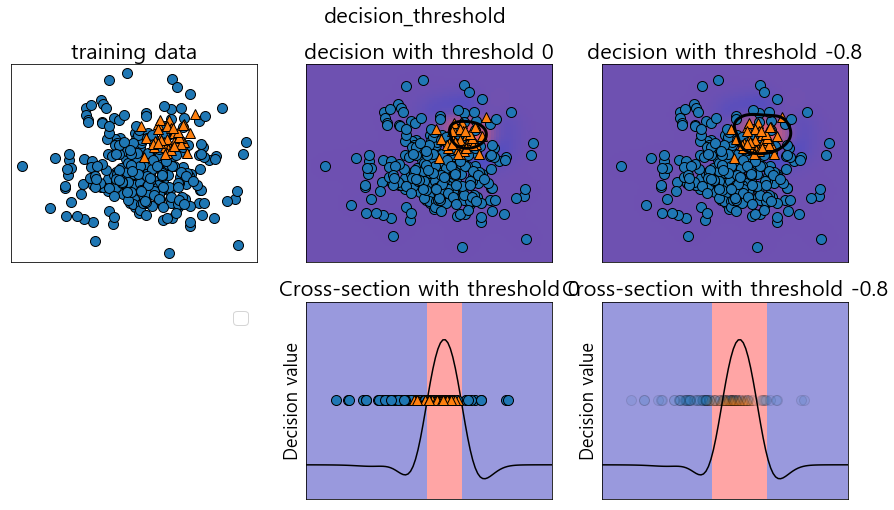

In [161]:
mglearn.plots.plot_decision_threshold()

In [76]:
arr = np.array([7,4,9,3,1])
print(arr.min())
print(np.min(arr))
print(np.argmin(arr)) # index

1
1
4


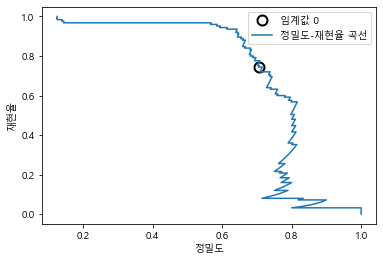

In [79]:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="임계값 0", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')
plt.show()
#argument minimum

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)

In [83]:
rf.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:,1])

In [108]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [176]:
np.argmin(abs(thresholds_rf-0.8))

18

In [177]:
threshold_rf[18]

0.19

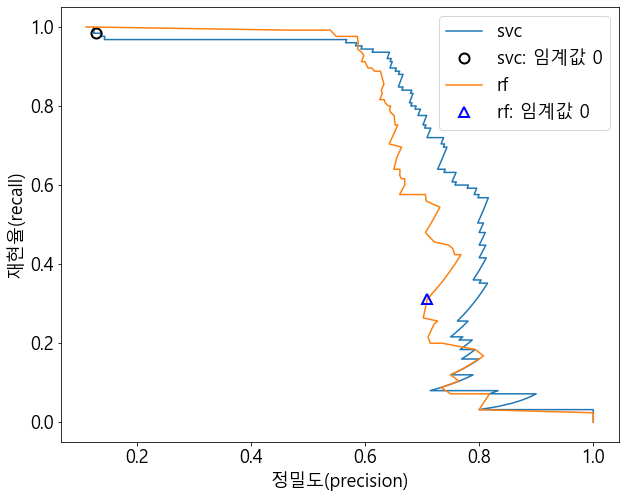

In [175]:
#위의 그래프
plt.figure(figsize=(10,8))
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize =10, label="svc: 임계값 0", fillstyle="none", c='k',mew=2)

#RF
plt.plot(precision_rf, recall_rf, label ="rf")
close_default_rf = np.argmin(np.abs(threshold_rf-0.8))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label="rf: 임계값 0", fillstyle="none", c='b',mew=2)

plt.xlabel("정밀도(precision)")
plt.ylabel("재현율(recall)")
plt.legend(loc='best')
plt.show()

In [112]:
print("랜덤 포레스트 f1 score: {:.3f}".format(f1_score(y_test,rf.predict(X_test))))
#랜덤 포레스트 f1 score: 0.642


랜덤 포레스트 f1 score: 0.642


In [113]:
print("SVC f1 score: {:.3f}".format(f1_score(y_test,svc.predict(X_test))))
#SVC f1 score: 0.727

SVC f1 score: 0.727


In [114]:
from sklearn.metrics import roc_curve

In [122]:
fpr, tpr, thresholds = roc_curve(y_test,svc.decision_function(X_test))

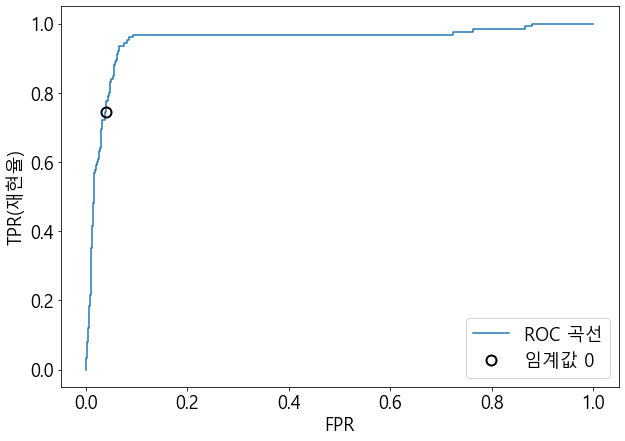

In [123]:
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o',markersize=10,label="임계값 0", fillstyle="none", c='k',mew=2)
plt.legend(loc=4)
plt.show()

In [126]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

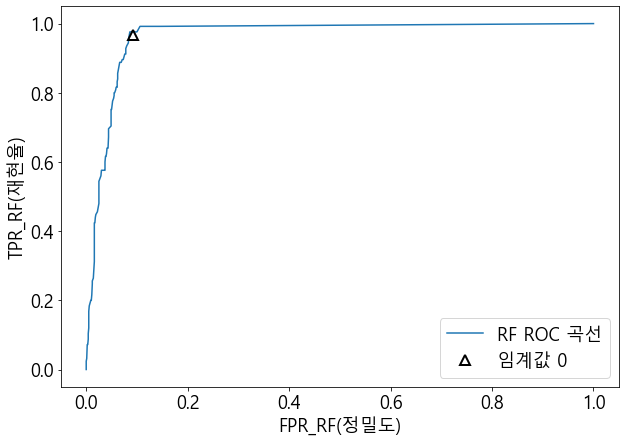

In [129]:
plt.figure(figsize=(10,7))

plt.plot(fpr_rf, tpr_rf, label="RF ROC 곡선")
plt.xlabel("FPR_RF(정밀도)")
plt.ylabel("TPR_RF(재현율)")
close_zero_rf = np.argmin(np.abs(thresholds_rf))
plt.plot(fpr[close_zero_rf], tpr[close_zero_rf], '^',markersize=10,label="임계값 0", fillstyle="none", c='k',mew=2)

plt.legend(loc=4)
plt.show()

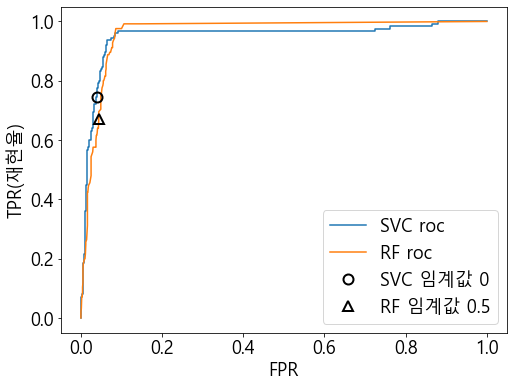

array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
       -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.32,
       -0.31, -0.3 , -0.29, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22,
       -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13,
       -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.04, -0.03,
       -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
        0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.32,  0.35,  0.36,  0.37,  0.38,
        0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,  0.46,  0.47,
        0.48,  0.49,  0.5 ])

In [135]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="SVC roc")
plt.plot(fpr_rf, tpr_rf, label="RF roc")
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)
plt.legend()
plt.show()0

In [137]:
# 다중 분류

In [136]:
from sklearn.metrics import accuracy_score

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

In [140]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [141]:
pred = lr.predict(X_test)

In [143]:
print("정확도 : {:.3f}".format(accuracy_score(y_test,pred)))

정확도 : 0.953


In [144]:
print("오차 행렬 : \n", confusion_matrix(y_test,pred))
# 다중 분류니까 이렇게 나오네 ㄷㄷ

오차 행렬 : 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



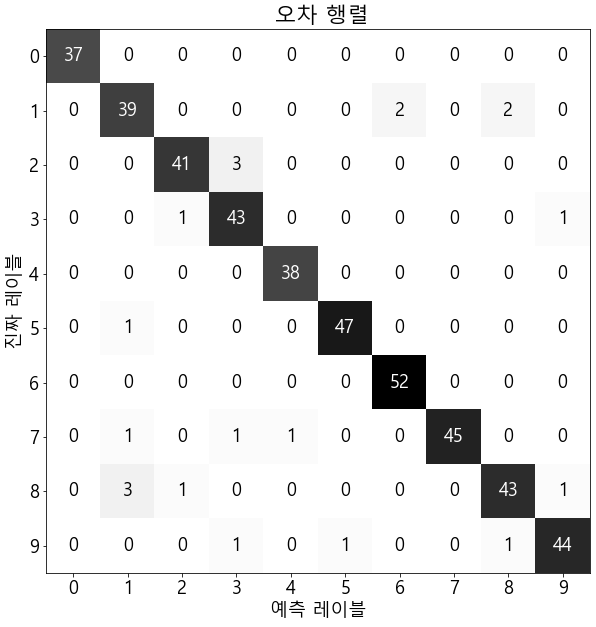

In [159]:
plt.figure(figsize=(10,10))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test,pred), xlabel="예측 레이블", ylabel="진짜 레이블",xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r,fmt="%d")
plt.title(" 오차 행렬")
plt.gca().invert_yaxis()

In [179]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [180]:
#회귀 평가 

In [182]:
print("기본 평가 지표:", cross_val_score(SVC(), digits.data, digits.target==9))

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [185]:
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                       scoring = 'accuracy', cv = 5)
print("정확도 지표 :", explicit_accuracy)
# default 가 정확도 인듯

정확도 지표 : [0.975      0.99166667 1.         0.99442897 0.98050139]


In [188]:
ap = cross_val_score(SVC(), digits.data, digits.target ==9, scoring='average_precision', cv=5)
print("평균 정밀도 지표:", ap)

평균 정밀도 지표: [0.97562403 0.9886322  1.         0.99853801 0.95015534]


In [194]:
from sklearn.model_selection import cross_validate

In [198]:
res = cross_validate(SVC(), digits.data, digits.target ==9 , 
                     scoring=['accuracy','average_precision','recall_macro'], return_train_score=True, cv =5)

pd.DataFrame(res) 
#print("", )

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.019946,0.010976,0.975000,0.994433,0.975624,0.994997,0.887346,0.972222
1,0.019977,0.008974,0.991667,0.995825,0.988632,0.996010,0.958333,0.982252
2,0.021476,0.008975,1.000000,0.995132,1.000000,0.995317,1.000000,0.978780
3,0.020945,0.009972,0.994429,0.995828,0.998538,0.995257,0.972222,0.982252
4,0.020113,0.009004,0.980501,0.996523,0.950155,0.999257,0.902778,0.985725


In [213]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target==9, random_state=0)

In [214]:
param_grid = {'gamma':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [215]:
print('best parameter :', grid.best_params_)

best parameter : {'gamma': 0.001}


In [216]:
print("최상의 교차 검증 점수 : {:.3f}".format(grid.best_score_))

최상의 교차 검증 점수 : 0.996


In [217]:
from sklearn.metrics import average_precision_score

In [218]:
print("테스트 평균 정밀도 : {:.3f}".format(
    average_precision_score(y_test, grid.decision_function(X_test))))
# 이진 분류여야 가능

테스트 평균 정밀도 : 0.997


In [221]:
print("테스트 정확도 : {:.3f}".format(accuracy_score(y_test,grid.predict(X_test))))

테스트 정확도 : 0.991


In [222]:
from sklearn.metrics.scorer import SCORERS

In [225]:
print(" 가능한 평가 방법 :\n",sorted(SCORERS.keys()) )]
# 존나게 많다 

 가능한 평가 방법 :
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [229]:
# 5장 끝

In [230]:
# 6장 알고리즘 체인과 파이프 라인 


In [231]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [232]:
cancer = load_breast_cancer()

In [233]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [234]:
scaler = MinMaxScaler().fit(X_train)

In [236]:
X_train_scaled = scaler.transform(X_train)

In [237]:
svm = SVC()

In [238]:
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [239]:
X_test_scaled = scaler.transform(X_test)

No handles with labels found to put in legend.


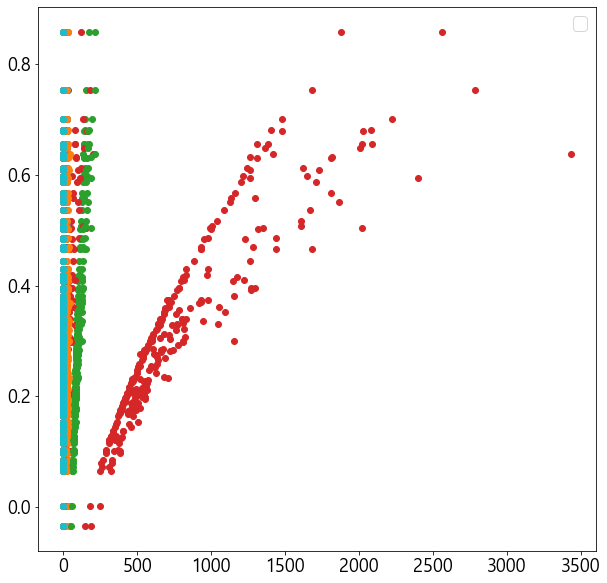

In [247]:
plt.figure(figsize=(10,10))
plt.plot(X_test,X_test_scaled[:,0],'o')
plt.legend()
plt.show()

In [248]:
print("test acc: {:.3f}".format(svm.score(X_test_scaled,y_test)))

test acc: 0.979


In [249]:
# grid search 하기 
from sklearn.model_selection import GridSearchCV

In [251]:
param_grid = {"C":[0.001,0.01,0.1,1,10,100],
             "gamma":[0.001,0.01,0.1,1,10,100]}


In [252]:
grid = GridSearchCV(SVC(), param_grid, cv=5)


In [253]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [254]:
print("최상의 교차 검증 정확도: {:.3f}".format(grid.best_score_))

최상의 교차 검증 정확도: 0.979


In [256]:
print("테스트 점수 : {:.3f}".format(grid.score(X_test_scaled,y_test)))

테스트 점수 : 0.979


In [258]:
print("Best Parameter : ", grid.best_params_)

Best Parameter :  {'C': 1, 'gamma': 1}


In [259]:
from sklearn.pipeline import Pipeline

In [269]:
# 이 4줄과 아래 pipe line은 같은 결과 
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [270]:
pipe = Pipeline([("scaler", MinMaxScaler()),("svm",SVC())])
#list 속 tuple
pipe.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [274]:
print("테스트 정확도 : {:.3f}".format(pipe.score(X_test, y_test)))

테스트 정확도 : 0.979
